# Merging DataFrames

# 데이터프레임 결합하기

In [ ]:
import pandas as pd

## Our Dataset
- Our datasets are spread across multiple files in this section. Each file has a `restaurant_` prefix.
- The `customers.csv` file stores our restaurant's customers.
- The `foods.csv` file stores our restaurant's menu items.
- The `week_1_sales` and `week_2_sales` files store our orders.

- 이 섹션에서는 여러 파일에 걸쳐 분산된 데이터셋 사용함.
각 파일은 restaurant_ 접두사를 가집니다.

- customers.csv 파일은 우리 레스토랑의 고객 정보를 저장.

- foods.csv 파일은 우리 레스토랑의 메뉴 항목을 저장.

- week_1_sales 및 week_2_sales 파일은 주문 내역을 저장.

In [ ]:
foods = pd.read_csv("restaurant_foods.csv")
customers = pd.read_csv("restaurant_customers.csv")
week1 = pd.read_csv("restaurant_week_1_sales.csv")
week2 = pd.read_csv("restaurant_week_2_sales.csv")

In [ ]:
foods.head() # 일단 항상 열, 행 모양 체크

In [ ]:
customers.head()

In [ ]:
week1.head()

In [ ]:
week2.head()

## The pd.concat Function I
- The `concat` function concatenates one **DataFrame** to the end of another.
- The original index labels will be kept by default. Set `ignore_index` to True to generate a new index.
- The `keys` parameter create a **MultiIndex** using the specified keys/labels.

- pandas 의 최상위 함수, 메소드 아님. 바로 pd.concat 으로 사용
- concat 함수는 하나의 DataFrame을 다른 DataFrame의 끝에 이어 붙임.

- 기본적으로 원본 인덱스 레이블이 유지됨.

- ignore_index=True로 설정하면 새로운 인덱스가 생성됨.

- keys 매개변수는 지정된 키/레이블을 사용하여 MultiIndex를 생성.

 - concanate: 하나의 끝에 또 다른 것을 붙인다

---

### 예시

#### 두개의 샘플 데이터 프레임을 만듦.

In [ ]:
# 두 개의 DataFrame 생성
data1 = {'A': [1, 2], 'B': [3, 4]}
data2 = {'A': [5, 6], 'B': [7, 8]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

print("DataFrame 1:")
print(df1)

print("\nDataFrame 2:")
print(df2)


#### concat 함수로 두 데이터프레임 연결 (행 기준이 기본 설정임)

In [ ]:
result = pd.concat([df1, df2])
print("\nconcat 결과 (행 기준):")
print(result)

#### axis= 1 로 하여 열 기준으로 연결 가능

In [ ]:
result_columns = pd.concat([df1, df2], axis=1)
print("\nconcat 결과 (열 기준):")
print(result_columns)

---

## 다시 레스토랑으로: 1주 2주 데이터를 연결해서 하나로 만들어보자.

In [ ]:
week1.head() # 체크

In [ ]:
week2.head()

### 사이즈를 미리 확인하여 연결이 잘 되었는지 확인할 수 있도록 한다.

In [ ]:
len(week1) # 체크

In [ ]:
len(week2)

### 1주차와 2주차 데이터를 일단 행 기준으로 연결해보자.

In [ ]:
# 판다스가 원본 인덱스를 유지한다는것을 확인하자.

### index 가 0 인 row 가 몇개인지 확인해보자.

In [ ]:
# 여기에

### 새로 만든 것은 인덱스가 마치 원래 하나의 데이터프레임이었던 것처럼 0-499 까지 연결되길 원한다면: ignore_index = True

In [ ]:
# 여기에

#### 서로 다른 데이터프레임에서 온 것을 표시하고 싶다면: key option



In [ ]:
# 여기에 : 두 데이터프레임을 구분할 수 있는 문자열 identifier 를 설정할 수 있음.

## The pd.concat Function II
- Pandas will concatenate the **DataFrames** along the row/index axis.
- Pandas will include all columns that exist in either **DataFrame**. If there are no matching values, pandas will use `NaN` values.
- We can pass the `axis` parameter an argument of `"columns"` to concatenate on the column axis.

- 지금 데이터를 열 이름이 같아서 다행인 것 -> 그렇지 않은 경우, 열 이름을 갖게 변경해 준 다음 진행할 수 있음.
- Pandas는 행/인덱스 축을 따라 DataFrame을 연결함.  
- Pandas는 두 DataFrame에 존재하는 모든 열을 포함시킴.  
  - 일치하는 값이 없는 경우 NaN 값이 사용됨.  
- `axis` 매개변수에 `"columns"`를 전달하면 열 축을 따라 연결할 수 있음.  


In [ ]:
df1 = pd.DataFrame([1, 2, 3], columns=["A"])
df1

In [ ]:
df2 = pd.DataFrame([4, 5, 6], columns=["B"])
df2

#### 열 이름이 다른데 concat 하면?

In [ ]:
#

#### 인덱스를 index 혹은 columns 로 조절할 수 있음.

In [ ]:
# axis = "index"


In [ ]:
# axis = "columns"

#### -> concat 을 하기 전에 최대한 각각의 데이터 프레임을 유사하게하는 것이 중요함.

## Left Joins
- The `merge` method joins two **DataFrames** together based on shared values in a column or an index.
- A left join merges one **DataFrame** into another based on values in the first one.
- The "left" **DataFrame** is the one we invoke the `merge` method on.
- If the left **DataFrame's** value is not found in the right **DataFrame**, the row will hold `NaN` values.


- merge 는 메서드임.
- `merge` 메서드는 열 또는 인덱스에서 공유되는 값을 기준으로 두 DataFrame을 결합함.  
- `left join`은 첫 번째 DataFrame의 값을 기준으로 다른 DataFrame을 병합함.  
- "left" DataFrame은 `merge` 메서드를 호출한 DataFrame임.  
- 왼쪽 DataFrame의 값이 오른쪽 DataFrame에서 찾을 수 없을 경우, 해당 행은 NaN 값을 가짐.  


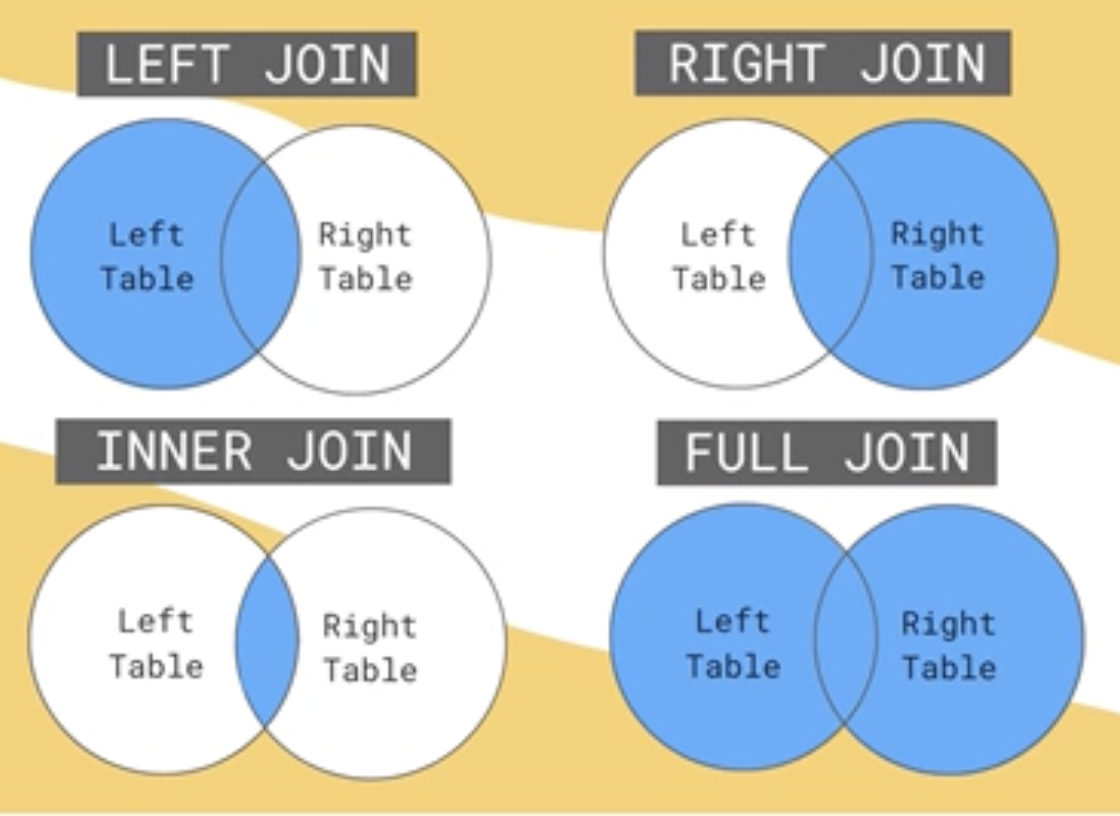

### foods 를 week1 오른쪽에 붙여서 두 데이터 프레임을 맞춰보자.

In [ ]:
foods.head()

In [ ]:
week1.head()

#### week1 이 left dataframe 이 되고, foods 가 right dataframe 이 되고, 여기서 공유하고 있는 Food ID 열을 기준으로 합친다.

In [ ]:
# 여기에: merge 를 호출하는 데이터프레임이 left 가 되게.

#### week1 에는 있는데, foods 에는 특정 Food ID 가 없을 경우?

In [ ]:
# 예시 데이터 1
sales_data = {
    "Customer ID": [537, 97, 658, 202, 155],
    "Food ID": [9, 4, 1, 2, 9]
}
week1 = pd.DataFrame(sales_data)


In [ ]:
# 예시 데이터 2
food_data = {
    "Food ID": [1, 2, 3, 4, 5],
    "Food Item": ["Sushi", "Burrito", "Taco", "Quesadilla", "Pizza"],
    "Price": [3.99, 9.99, 2.99, 4.25, 2.49]
}
foods = pd.DataFrame(food_data)

In [ ]:
# 둘을 left merge 하면?
merged_df

In [ ]:
# 확인
print(merged_df)

## The left_on and right_on Parameters
- The `left_on` and `right_on` parameters designate the column names from each **DataFrame** to use in the merge.

- `left_on`과 `right_on` 매개변수는 각 DataFrame에서 병합에 사용할 열 이름을 지정함.  


#### 예시

In [ ]:
# 위에서 쓴 foods, week1 예시 데이터를 다시 갖고 와보자.
# 데이터프레임1
food_data = {
    "ID": [1, 2, 3, 4, 5],
    "Food Item": ["Sushi", "Burrito", "Taco", "Quesadilla", "Pizza"],
    "Price": [3.99, 9.99, 2.99, 4.25, 2.49]
}
foods_sample = pd.DataFrame(food_data)

# 데이터프레임2
sales_data = {
    "Customer ID": [537, 97, 658, 202, 155],
    "Food_Code": [1, 4, 1, 2, 5]
}
week1_sample = pd.DataFrame(sales_data)

In [ ]:
# left_on


### 레스토랑 데이터의 경우

In [ ]:
foods = pd.read_csv("restaurant_foods.csv")
customers = pd.read_csv("restaurant_customers.csv")
week1 = pd.read_csv("restaurant_week_1_sales.csv")
week2 = pd.read_csv("restaurant_week_2_sales.csv")

In [ ]:
# week2 와 customer 데이터프레임을 사용해보자.
week2.head()

In [ ]:
customers.head() # 둘 사이에 공통 열은 없음. ID-> Food ID

#### 둘 사이에 공통 열이 없어서, 각각 어떤 열을 쓸지 결정해주는 것: left_on, right_on

In [ ]:
# 각 열이 유지되는 것을 확인하자. : ID, Customer ID

#### 중복 열이 싫다면 drop을 써서 삭제 가능.

In [ ]:
# ID 열을 삭제해보자.

---
---
---


## Inner Joins I
- Inner joins merge two tables based on *shared*/*common* values in columns.
- If only one **DataFrame** has a value, pandas will exclude it from the final results set.
- If the same ID occurs multiple times, pandas will store each possible combination of the values.
- The design of the join ensures that the results will be the same no matter what **DataFrame** the `merge` method is invoked upon.


- `inner join`은 두 테이블을 공통된 열의 값을 기준으로 병합함.  
- 한 DataFrame에만 있는 값은 최종 결과에서 제외됨.  
- 동일한 ID가 여러 번 나타나면, pandas는 가능한 모든 값의 조합을 저장함.  
- 어떤 DataFrame에서 `merge` 메서드를 호출하더라도 결과는 동일하게 나옴.  


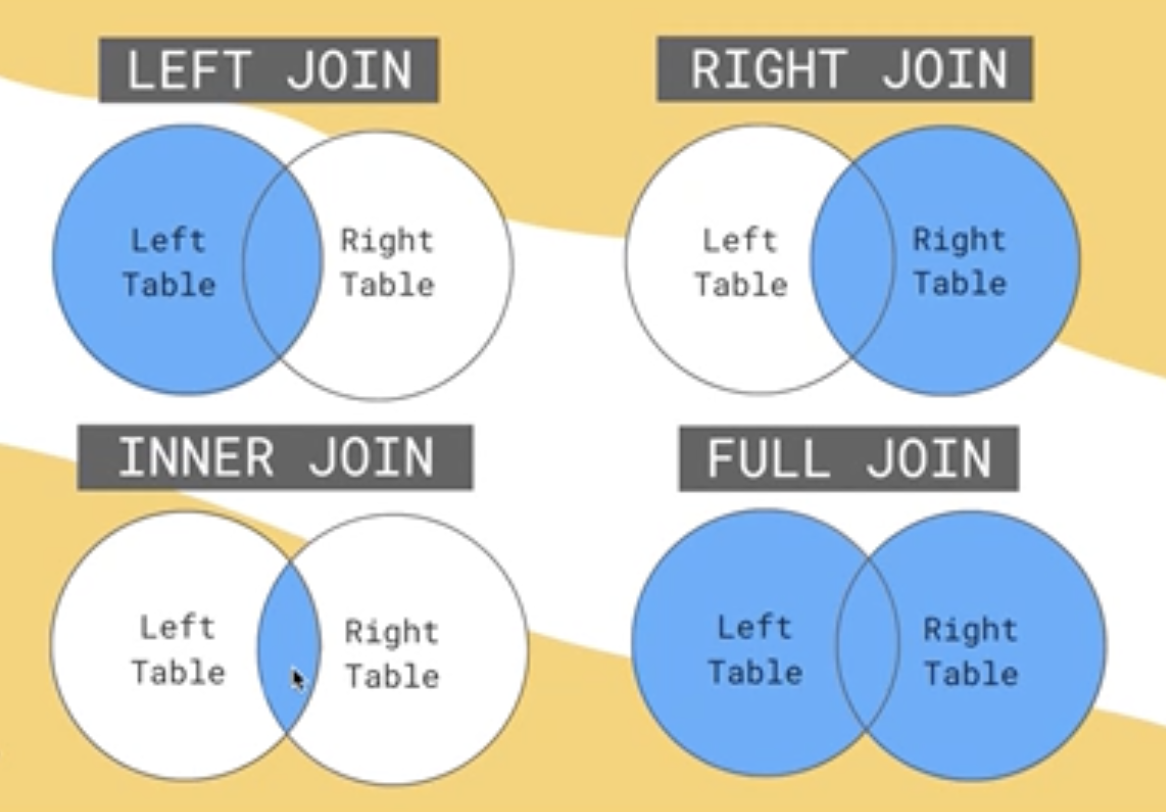

In [ ]:
foods = pd.read_csv("restaurant_foods.csv")
customers = pd.read_csv("restaurant_customers.csv")
week1 = pd.read_csv("restaurant_week_1_sales.csv")
week2 = pd.read_csv("restaurant_week_2_sales.csv")

In [ ]:
# 데이터 형태 다시 체크
week1.head()

In [ ]:
week2.head()

### 두 주 모두 방문한 손님 체크

In [ ]:
week1[week1["Customer ID"] == 503]

In [ ]:
week2[week2["Customer ID"] == 503]

### 두 주 모두 방문한 손님으로만 이루어진 데이터프레임 만들기

In [ ]:
# how = "inner", on = "Customer ID"




In [ ]:
# suffixeds = ["-Week1", "-Week2"] : 중복된 열이름을 분리
# 여러번 등장하는 것을 최대한 유지하고자 함.

## Inner Joins II
- We can pass multiple arguments to the `on` parameter of the `merge` method. Pandas will require matches in both columns across the **DataFrames**.

- `on` 매개변수에 여러 인자를 전달할 수 있음.  
- Pandas는 두 DataFrame의 각 열에서 일치하는 값을 요구함.  


In [ ]:
foods = pd.read_csv("restaurant_foods.csv")
customers = pd.read_csv("restaurant_customers.csv")
week1 = pd.read_csv("restaurant_week_1_sales.csv")
week2 = pd.read_csv("restaurant_week_2_sales.csv")

### 데이터 형태를 다시 상기해보자.

In [ ]:
week1.head()

In [ ]:
week2.head()

### 여러 열을 사용해서 inner merge 하기 : 2주 연속 방문하고, 같은 음식 주문한 사람으로 이루어진 데이터프레임 만들기

In [ ]:
#

In [ ]:
# 잘 찾아졌는지 확인

### 왜 21번 손님은 두번 등장할가?

In [ ]:
#

In [ ]:
condition_one = week2["Customer ID"] == 21
condition_two = week2["Food ID"] == 4
week2[condition_one & condition_two]

## Full/Outer Join
- A **full/outer** joins values that are found in either **DataFrame** or both **DataFrames**.
- Pandas does not mind if a value exists in one **DataFrame** but not the other.
- If a value does not exist in one **DataFrame**, it will have a `NaN`.



- `full/outer join`은 한 DataFrame 또는 두 DataFrame 모두에서 발견된 값을 병합함.  
- 한 DataFrame에만 있는 값이 있어도 Pandas는 문제 삼지 않음.  
- 한 DataFrame에 값이 없을 경우, 해당 위치에는 NaN이 들어감.  


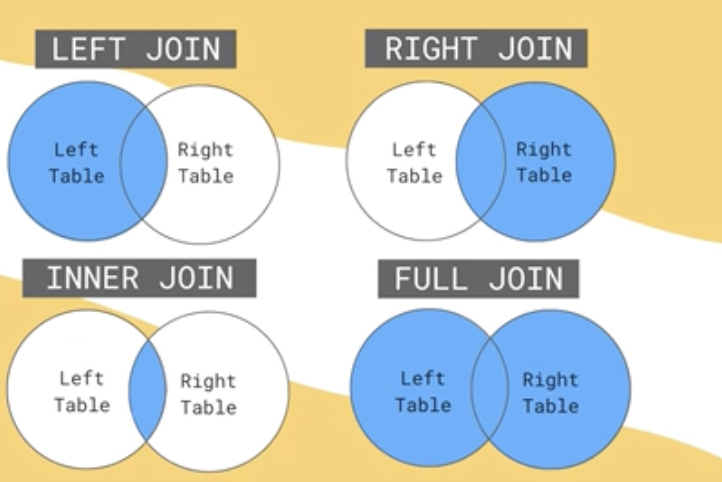

In [ ]:
foods = pd.read_csv("restaurant_foods.csv")
customers = pd.read_csv("restaurant_customers.csv")
week1 = pd.read_csv("restaurant_week_1_sales.csv")
week2 = pd.read_csv("restaurant_week_2_sales.csv")

In [ ]:
week1.head() # reminder

In [ ]:
week2.head()

### 합집합 같은 데이터 프레임 만들기.

In [ ]:
# how = "outer"

### 겹치는 열이름 처리

In [ ]:
# suffixes

### 겹쳐서 등장한 영역 표시하기: indicator

In [ ]:
#

### 이렇게 결합된 데이터프레임 독립적으로 저장

In [ ]:
#

### 등장한 종류대로 횟수 카운트

In [ ]:
#

### merged 에서 각 한종류에만 보이는 데이터 추출

In [ ]:
# 해보기

## Merging by Indexes with the left_index and right_index Parameters
- Use the `on` parameter if the column(s) to be matched on have the same names in both **DataFrames**.
- Use the `left_on` and `right_on` parameters if the column(s) to be matched on have different names in the two **DataFrames**.
- Use the `left_index` or `right_index` parameters (set to True) to if the values to be matched on are found in the index of a **DataFrame**.

- 두 DataFrame에서 일치시킬 열의 이름이 동일할 경우, `on` 매개변수를 사용.  
- 두 DataFrame에서 일치시킬 열의 이름이 다를 경우, `left_on`과 `right_on` 매개변수를 사용.  
- 일치시킬 값이 DataFrame의 인덱스에 있을 경우, `left_index` 또는 `right_index`를 `True`로 설정.  


### 예제

#### 왼쪽 (메인 데이터) 에서의 Food ID 와 결합될 값이 오른쪽 데이터에 인덱스에 있을 때

In [ ]:
# 위에서 썼던 샘플 데이터들
foods_sample = pd.DataFrame({
    "Food Item": ["Sushi", "Burrito", "Taco", "Quesadilla", "Pizza"],
    "Price": [3.99, 9.99, 2.99, 4.25, 2.49]
}, index=[1, 2, 3, 4, 5])
print(foods_sample.head())

sales_sample = pd.DataFrame({
    "Customer ID": [537, 97, 658, 202, 155],
    "Food ID": [1, 4, 1, 2, 6]  # 6번 Food ID는 foods DataFrame에 없음
})
print(sales_sample.head())



In [ ]:
# left_index, right_index 써서 merge
merged_df = sales_sample.merge(foods_sample, how="left", left_on="Food ID",
                        right_index=True)
merged_df.head()


### 다시 레스토랑 데이터로

In [ ]:
# 신선하게, 그러나 인덱스로 쓰는 부분 바꿔서.
foods = pd.read_csv("restaurant_foods.csv", index_col="Food ID")
customers = pd.read_csv("restaurant_customers.csv", index_col="ID")
week1 = pd.read_csv("restaurant_week_1_sales.csv")
week2 = pd.read_csv("restaurant_week_2_sales.csv")

In [ ]:
# 어떻게 바뀌었나 보자. 이건 안바뀌었고
week1.head()

In [ ]:
# 여긴 ID 가 인덱스로
customers.head()

In [ ]:
# Food ID 가 인덱스로
foods.head()

### week1 의 customer ID 컬럼과 customer df 의 index 를 써서 merge

In [ ]:
#

### 위에서 병합된 데이터프레임에 foods 데이터 프레임의 index 를 쓰고, 왼쪽 데이터프레임의 Food ID 써서 병합

In [ ]:
#


## The join Method
- The `join` method is a shortcut for concatenating two **DataFrames** when merging by index labels.

- `join` 메서드는 인덱스 레이블을 기준으로 두 **DataFrame**을 병합하는 간편한 방법임.  


### 예시

In [ ]:
# 첫 번째 DataFrame (고객 정보 - 인덱스는 Customer ID)
customers = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [24, 27, 22]
}, index=[101, 102, 103])

# 두 번째 DataFrame (주문 정보 - 인덱스는 Customer ID)
orders = pd.DataFrame({
    "Order ID": [1, 2, 3],
    "Item": ["Pizza", "Sushi", "Burger"]
}, index=[101, 102, 104])

In [ ]:
customers.head()

In [ ]:
orders.head()

In [ ]:
# join을 사용하여 고객 정보와 주문 정보를 병합 (left join이 기본값)
# 왼쪽 (원본) 데이터프레임 인덱스에 없으면 배제
merged_df = customers.join(orders, how="left")
merged_df

### 다시 레스토랑 데이터

In [ ]:
foods = pd.read_csv("restaurant_foods.csv")
customers = pd.read_csv("restaurant_customers.csv")
week1 = pd.read_csv("restaurant_week_1_sales.csv")
week2 = pd.read_csv("restaurant_week_2_sales.csv")
times = pd.read_csv("restaurant_week_1_times.csv") # 뉴데이터! 손님들이 순서대로 들어옴

In [ ]:
week1.head() # check

In [ ]:
times.head() # check

### 각 손님이 들어온 시간을 합쳐보자.

In [ ]:
# 그냥 merge 로

### 같은 기능을 join 으로

In [ ]:
#